---
**This notebook uses the Python 3.5 kernel.**  

---

# Setup

In [1]:
%matplotlib inline
import timeit
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
print("NumPy   %s" % np.__version__)
print("Seaborn %s" % sns.__version__)

NumPy   1.12.1
Seaborn 0.7.1


In [3]:
# Set values to expand lists
vals = list(np.geomspace(10, 1000000, num=6, dtype='int'))

# timeit example
[timeit.timeit('range(%d)' % num) for num in vals]

[0.3041924620001737,
 0.2681176800006142,
 0.3081923569998253,
 0.298154414000237,
 0.30037256900050124,
 0.29443045900006837]

---

# Plot Functions

In [4]:
def my_plot1(vals, slow_times, fast_times, title="", ylabel="", xlabel=""):
    '''
    Function to plot slow vs fast times with legend.
    '''
    plt.plot(np.log10(vals), slow_times);
    plt.plot(np.log10(vals), fast_times);
    plt.title(title);
    plt.xlabel(xlabel);
    plt.ylabel(ylabel);
    plt.xticks(range(1,6));
    plt.legend(['slow', 'fast'])

In [5]:
def my_plot2(slow_times, fast_times, title="", ylabel="", xlabel=""):
    '''
    Function to plot slow vs fast times with legend.
    '''
    # Setup
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ind = np.arange(6)                
    width = 0.35
    # Plots
    bar1 = ax.bar(ind, slow_times, width, color='darkblue', log=True)
    bar2 = ax.bar(ind+width, fast_times, width, color='darkgreen', log=True)
    ax.legend( (bar1[0], bar2[0]), ('slow', 'fast') );
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

---

# Looping Over A Collection

In [6]:
# Looping over a collection
for choice in ['Bad', 'Better']:   
    if choice is 'Bad':
        print('Bad')
        for val in vals:
            colors = ['red', 'green', 'blue', 'yellow']*val
            %timeit [colors[i] for i in range(len(colors))]        
    else:
        print('\nBetter')
        for val in vals:
            colors = ['red', 'green', 'blue', 'yellow']*val
            %timeit [color for color in colors]

Bad
100000 loops, best of 3: 4.04 µs per loop
10000 loops, best of 3: 28.4 µs per loop
1000 loops, best of 3: 282 µs per loop
100 loops, best of 3: 2.94 ms per loop
10 loops, best of 3: 29.7 ms per loop
1 loop, best of 3: 303 ms per loop

Better
100000 loops, best of 3: 2.13 µs per loop
100000 loops, best of 3: 12.8 µs per loop
10000 loops, best of 3: 106 µs per loop
1000 loops, best of 3: 1.17 ms per loop
100 loops, best of 3: 11.9 ms per loop
10 loops, best of 3: 121 ms per loop


In [7]:
def slow_collection():
    out = [timeit.timeit("[colors[i] for i in range(len(colors))]",
                         "colors = ('red', 'green', 'blue', 'yellow')*%d" % val, number=10) for val in vals]
    return [i*10e4 for i in out] # for ms
def fast_collection():
    out = [timeit.timeit("[color for color in colors]",
                         "colors = ('red', 'green', 'blue', 'yellow')*%d" % val, number=10) for val in vals]
    return [i*10e4 for i in out] # for ms

In [8]:
sc = slow_collection()
fc = fast_collection()

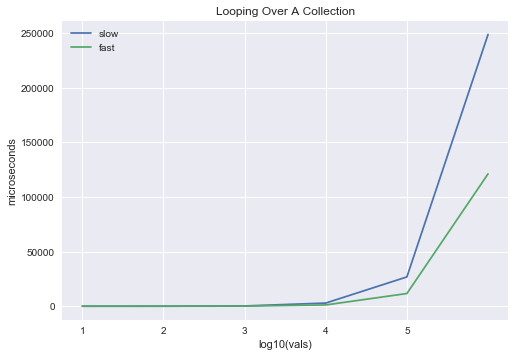

In [9]:
my_plot1(vals, sc, fc, 
        title="Looping Over A Collection", 
        xlabel="log10(vals)", 
        ylabel="microseconds")

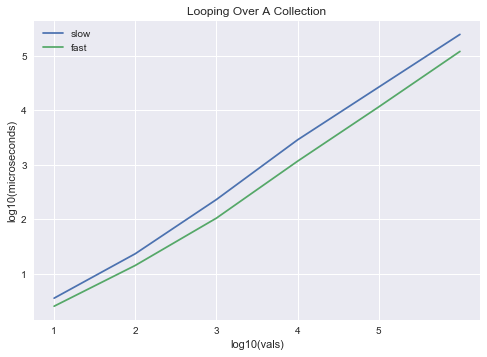

In [10]:
my_plot1(vals, np.log10(sc), np.log10(fc), 
        title="Looping Over A Collection", 
        xlabel="log10(vals)", 
        ylabel="log10(microseconds)")

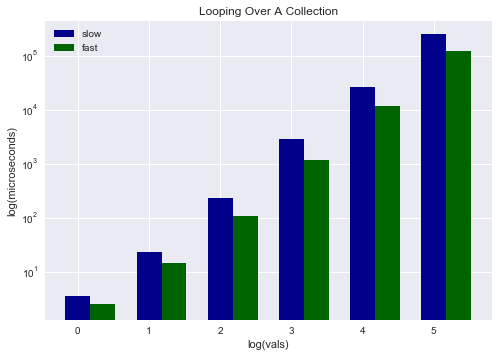

In [11]:
my_plot2(sc, fc, title="Looping Over A Collection", 
         xlabel='log(vals)', 
         ylabel="log(microseconds)")

---

# Sorting Lists

In [12]:
# Sorting lists
for choice in ['range', 'reversed']:   
    if choice is 'range':
        print('range')
        for val in vals:
            colors = ['red', 'green', 'blue', 'yellow']*val
            %timeit [colors[i] for i in range(len(colors)-1, -1, -1)]     
    else:
        print('\nreversed')
        for val in vals:
            colors = ['red', 'green', 'blue', 'yellow']*val
            %timeit [color for color in reversed(colors)]

range
100000 loops, best of 3: 3.86 µs per loop
10000 loops, best of 3: 27.3 µs per loop
1000 loops, best of 3: 261 µs per loop
100 loops, best of 3: 2.86 ms per loop
10 loops, best of 3: 28.9 ms per loop
1 loop, best of 3: 288 ms per loop

reversed
100000 loops, best of 3: 2.42 µs per loop
100000 loops, best of 3: 13.7 µs per loop
10000 loops, best of 3: 111 µs per loop
1000 loops, best of 3: 1.18 ms per loop
100 loops, best of 3: 11.8 ms per loop
10 loops, best of 3: 122 ms per loop


In [13]:
def slow_sort():
    out = [timeit.timeit("[colors[i] for i in range(len(colors)-1, -1, -1)]",
                         "colors = ('red', 'green', 'blue', 'yellow')*%d" % val, number=10) for val in vals]
    return [i*10e4 for i in out] # for ms
def fast_sort():
    out = [timeit.timeit("[color for color in reversed(colors)]",
                         "colors = ('red', 'green', 'blue', 'yellow')*%d" % val, number=10) for val in vals]
    return [i*10e4 for i in out] # for ms

In [14]:
ss = slow_sort()
fs = fast_sort()

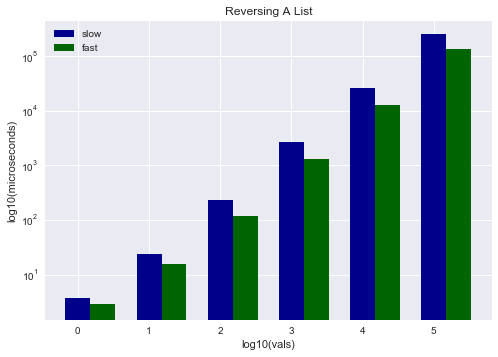

In [15]:
my_plot2(ss, fs, 
        title="Reversing A List", 
        xlabel="log10(vals)", 
        ylabel="log10(microseconds)")

---

# Looping Over A Collection & Indices

In [16]:
# Looping over a collection and indices
for choice in ['range', 'enumerate']:   
    if choice is 'range':
        print('range')
        for val in vals:
            colors = ['red', 'green', 'blue', 'yellow']*val
            %timeit [(i, colors[i]) for i in range(len(colors))]
        
    else:
        print('\nenumerate')
        for val in vals:
            colors = ['red', 'green', 'blue', 'yellow']*val
            %timeit [(i, colors[i]) for i, color in enumerate(colors)]

range
100000 loops, best of 3: 4.88 µs per loop
10000 loops, best of 3: 38.7 µs per loop
1000 loops, best of 3: 426 µs per loop
100 loops, best of 3: 5.02 ms per loop
10 loops, best of 3: 65.3 ms per loop
1 loop, best of 3: 669 ms per loop

enumerate
100000 loops, best of 3: 5.24 µs per loop
10000 loops, best of 3: 44.1 µs per loop
1000 loops, best of 3: 486 µs per loop
100 loops, best of 3: 5.58 ms per loop
10 loops, best of 3: 72.9 ms per loop
1 loop, best of 3: 743 ms per loop


In [17]:
def slow_collection_indices():
    out = [timeit.timeit("[(i, colors[i]) for i in range(len(colors))]",
                         "colors = ('red', 'green', 'blue', 'yellow')*%d" % val, number=10) for val in vals]
    return [i*10e4 for i in out] # for ms
def fast_collection_indices():
    out = [timeit.timeit("[(i, colors[i]) for i, color in enumerate(colors)]",
                         "colors = ('red', 'green', 'blue', 'yellow')*%d" % val, number=10) for val in vals]
    return [i*10e4 for i in out] # for ms

In [18]:
sci = slow_collection_indices()
fci = fast_collection_indices()

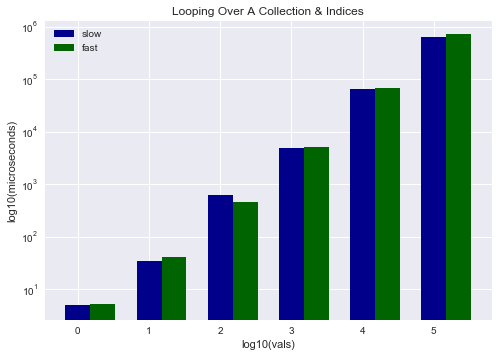

In [19]:
my_plot2(sci, fci, 
        title="Looping Over A Collection & Indices", 
        xlabel="log10(vals)", 
        ylabel="log10(microseconds)")

---

# Looping Over Two Collections

In [20]:
# Loop over two collections
for choice in ['range', 'zip']:   
    if choice is 'range':
        print('range')
        for val in vals:
            colors = ['red', 'green', 'blue', 'yellow']*val
            names = list('abcd')*val
            %timeit [(names[i], colors[i]) for i in range(min(len(names), len(colors)))]
    else:
        print('\nzip')
        for val in vals:
            colors = ['red', 'green', 'blue', 'yellow']*val
            names = list('abcd')*val
            %timeit [(name, color) for name, color in zip(names, colors)]

range
100000 loops, best of 3: 6.38 µs per loop
10000 loops, best of 3: 52.6 µs per loop
1000 loops, best of 3: 554 µs per loop
100 loops, best of 3: 6.13 ms per loop
10 loops, best of 3: 70.9 ms per loop
1 loop, best of 3: 735 ms per loop

zip
100000 loops, best of 3: 4.19 µs per loop
10000 loops, best of 3: 31.5 µs per loop
1000 loops, best of 3: 332 µs per loop
100 loops, best of 3: 3.71 ms per loop
10 loops, best of 3: 46.5 ms per loop
1 loop, best of 3: 496 ms per loop


---

# Appending Strings

In [21]:
# Appending Strings
my_string = ""
for choice in ['Bad', 'Better']:   
    if choice is 'Bad':
        print('+=')
        for val in vals:
            mylist = list('abcdefghijklmnopqrstuvwxyz')*val
            %time for item in mylist: my_string += item
    else:
        print('\n.join')
        for val in vals:
            mylist = list('abcdefghijklmnopqrstuvwxyz')*val
            %time my_string = "".join([item for item in mylist])

+=
CPU times: user 52 µs, sys: 0 ns, total: 52 µs
Wall time: 54.8 µs
CPU times: user 795 µs, sys: 13 µs, total: 808 µs
Wall time: 850 µs
CPU times: user 6.1 ms, sys: 164 µs, total: 6.26 ms
Wall time: 6.21 ms
CPU times: user 66.1 ms, sys: 1.62 ms, total: 67.7 ms
Wall time: 67.9 ms
CPU times: user 595 ms, sys: 3.31 ms, total: 598 ms
Wall time: 599 ms
CPU times: user 5.92 s, sys: 20 ms, total: 5.94 s
Wall time: 5.95 s

.join
CPU times: user 23 µs, sys: 1.31 ms, total: 1.33 ms
Wall time: 1.33 ms
CPU times: user 105 µs, sys: 1e+03 ns, total: 106 µs
Wall time: 107 µs
CPU times: user 956 µs, sys: 4 µs, total: 960 µs
Wall time: 962 µs
CPU times: user 9.05 ms, sys: 643 µs, total: 9.7 ms
Wall time: 10.1 ms
CPU times: user 95.1 ms, sys: 9.93 ms, total: 105 ms
Wall time: 105 ms
CPU times: user 955 ms, sys: 103 ms, total: 1.06 s
Wall time: 1.06 s


---

# Using Standard Library

In [22]:
# Standard Library

for choice in ['listexp', 'map']:   
    if choice is 'listexp':
        print('listexp')
        for val in vals:
            %timeit [np.cumsum(item) for item in range(val)]
    else:
        print('\nmap')
        for val in vals:
            %timeit newlist = map(np.cumsum, range(val))

listexp
10000 loops, best of 3: 59.5 µs per loop
1000 loops, best of 3: 598 µs per loop
100 loops, best of 3: 5.85 ms per loop
10 loops, best of 3: 58.3 ms per loop
1 loop, best of 3: 580 ms per loop
1 loop, best of 3: 5.86 s per loop

map
The slowest run took 4.91 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 535 ns per loop
1000000 loops, best of 3: 517 ns per loop
1000000 loops, best of 3: 590 ns per loop
1000000 loops, best of 3: 588 ns per loop
1000000 loops, best of 3: 598 ns per loop
1000000 loops, best of 3: 591 ns per loop


---

# Listexp vs Genexp

In [23]:
# listexp vs genexp

for choice in ['listexp', 'genexp']:   
    if choice is 'listexp':
        print('listexp')
        for val in vals:
            %timeit [np.cumsum(item) for item in range(val)] # list expression
    else:
        print('\ngenexp')
        for val in vals:
            %timeit (np.cumsum(item) for item in range(val)) # generator expression

listexp
10000 loops, best of 3: 58.5 µs per loop
1000 loops, best of 3: 590 µs per loop
100 loops, best of 3: 5.92 ms per loop
10 loops, best of 3: 58.3 ms per loop
1 loop, best of 3: 590 ms per loop
1 loop, best of 3: 6 s per loop

genexp
1000000 loops, best of 3: 661 ns per loop
1000000 loops, best of 3: 668 ns per loop
1000000 loops, best of 3: 715 ns per loop
1000000 loops, best of 3: 701 ns per loop
1000000 loops, best of 3: 701 ns per loop
1000000 loops, best of 3: 722 ns per loop


---

# Dots

In [24]:
# Dots matter (marginally)
for choice in ['Bad', 'Better']:   
    if choice is 'Bad':
        print('Bad')
        newlist = []
        for val in vals:
            %timeit newlist.append(np.cumsum(val))
    else:
        print('\nBetter')
        newlist = []
        cumsum = np.cumsum
        append = newlist.append
        for val in vals:
            %timeit append(cumsum(val))

Bad
The slowest run took 11.25 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 2.57 µs per loop
The slowest run took 5.35 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 2.53 µs per loop
The slowest run took 4.75 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 2.56 µs per loop
The slowest run took 4.57 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 2.59 µs per loop
The slowest run took 4.88 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 2.6 µs per loop
The slowest run took 5.20 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 2.56 µs per loop

Better
The slowest run took 7.99 ti

## Links
[4 Performance Optimization Tips For Faster Python Code](http://blog.hackerearth.com/4-Performance-Optimization-Tips-Faster-Python-Code)  
[PythonSpeed Performance Tips](https://wiki.python.org/moin/PythonSpeed/PerformanceTips)  
[6 Python Performance Tips](https://dzone.com/articles/6-python-performance-tips)